In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [4]:
df = pd.read_csv('maildata.csv', encoding='latin-1')
df = df[['Category', 'Message']]  # keep only necessary columns
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})  # encode target


In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])  # features
y = df['Category']  # labels


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9829596412556054

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



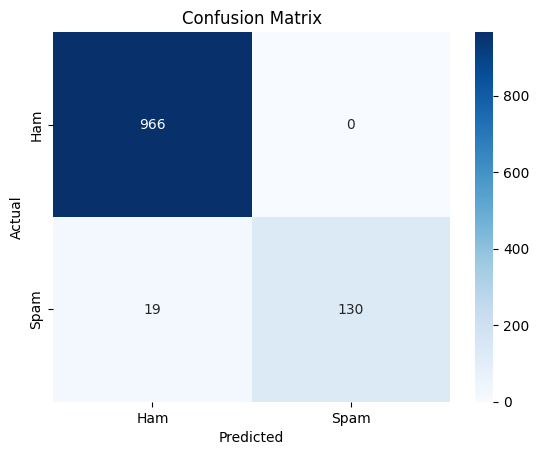

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
joblib.dump(model, 'svm_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [11]:
def predict_new_message(message, model, vectorizer):
    message_vector = vectorizer.transform([message])
    prediction = model.predict(message_vector)[0]
    return "Spam" if prediction == 1 else "Ham"

# Example:
print(predict_new_message("Congratulations! You've won a free ticket.", model, vectorizer))


Ham
